In [1]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import re

#legged_room00  3.01
#legged_grass00 3.37
#legged_grass01 3.49
#legged_transition00 3.36
#legged_tunnel00 3.31
#handheld_grass00 -0.23
#handheld_room00 -0.72
#handheld_room01 -0.73
#handheld_starbucks00 -0.64
#handheld_starbucks01 -0.67
#handheld_tunnel00 3.2
#ugv_transition00 0.02
#ugv_transition01 0.06

In [2]:
# 初始化参数
t_offset_values = [i * 0.01 for i in range(-150, 50)]  # 从-0.5到0.5，步长为0.1
#t_offset_values = [i * 0.1 for i in range(-20, 40)]  # 从-0.5到0.5，步长为0.1
results = []

In [3]:
# 循环执行命令
for t_offset in t_offset_values:
    command = [
        'evo_ape', 'tum',
        './resampled/handheld_escalator00_resampled.txt',
        './fastlio2/laptop/traj/handheld_escalator00_fastlio2.txt', '-a', '--t_max_diff', '0.1', '--t_offset', str(t_offset)
    ]
    #print(command)
    process = subprocess.run(command, capture_output=True, text=True)
    
    # 首先打印完整的命令输出
    output = process.stdout
    #print(f"Command output at t_offset {t_offset}:\n{output}")
    
    # 然后解析输出以提取APE的RMSE值
    match = re.search(r"rmse\s+(\d+\.\d+)", output)  # 使用正则表达式匹配RMSE值
    if match:
        ape_rmse = float(match.group(1))
        results.append(ape_rmse)
        print(f"Extracted RMSE: {ape_rmse} at {t_offset}")
    else:
        results.append(None)  # 如果未找到匹配项，添加None
        print("RMSE value not found.")

Extracted RMSE: 0.442426 at -1.5
Extracted RMSE: 0.440115 at -1.49
Extracted RMSE: 0.433249 at -1.48
Extracted RMSE: 0.423356 at -1.47
Extracted RMSE: 0.421082 at -1.46
Extracted RMSE: 0.418254 at -1.45
Extracted RMSE: 0.415386 at -1.44
Extracted RMSE: 0.407757 at -1.43
Extracted RMSE: 0.397568 at -1.42
Extracted RMSE: 0.395322 at -1.41
Extracted RMSE: 0.392677 at -1.4000000000000001
Extracted RMSE: 0.38988 at -1.3900000000000001
Extracted RMSE: 0.38206 at -1.3800000000000001
Extracted RMSE: 0.373434 at -1.37
Extracted RMSE: 0.370856 at -1.36
Extracted RMSE: 0.367884 at -1.35
Extracted RMSE: 0.365428 at -1.34
Extracted RMSE: 0.357742 at -1.33
Extracted RMSE: 0.347511 at -1.32
Extracted RMSE: 0.345199 at -1.31
Extracted RMSE: 0.342498 at -1.3
Extracted RMSE: 0.340175 at -1.29
Extracted RMSE: 0.333225 at -1.28
Extracted RMSE: 0.323448 at -1.27
Extracted RMSE: 0.320832 at -1.26
Extracted RMSE: 0.318603 at -1.25
Extracted RMSE: 0.315763 at -1.24
Extracted RMSE: 0.307688 at -1.23
Extracted 

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(t_offset_values, results, marker='o')
plt.title('APE Mean vs. Time Offset')
plt.xlabel('Time Offset (s)')
plt.ylabel('APE Mean')
plt.grid(True)
plt.show()

In [4]:
# 找出 RMSE 最小值及其对应的 t_offset
min_rmse = min(results)  # 假设 results 中没有 None 值
min_rmse_index = results.index(min_rmse)
min_rmse_offset = t_offset_values[min_rmse_index]
print(f" The minimum offset is {min_rmse_offset}")

 The minimum offset is -0.64


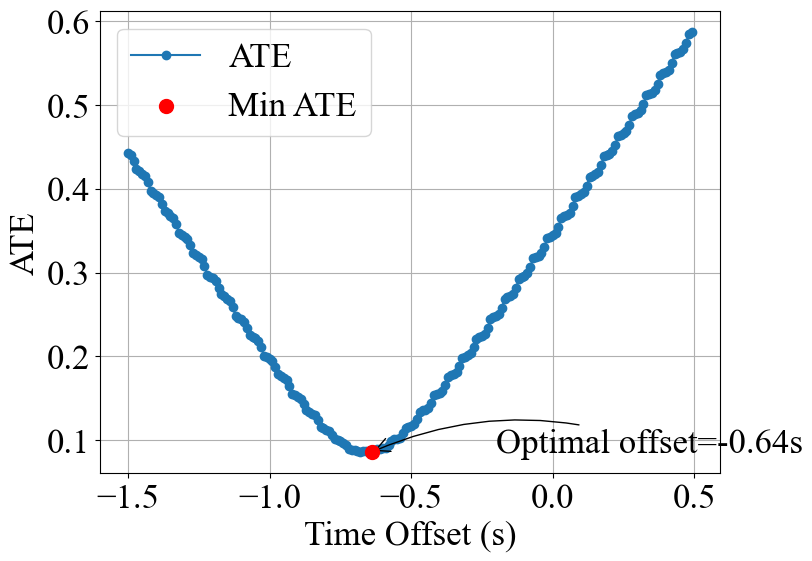

In [6]:
# 绘制 RMSE 曲线
plt.figure(figsize=(8,6))
plt.plot(t_offset_values, results, marker='o', label='ATE')
# 标记 RMSE 最小值的点
plt.scatter(min_rmse_offset, min_rmse, color='red', s=100, label='Min ATE', zorder=5)
# 在标记点上添加注释显示对应的 t_offset 值
plt.annotate(f"Optimal offset={min_rmse_offset}s", 
             (min_rmse_offset, min_rmse),
             textcoords="offset points", 
             xytext=(200,0), 
             ha='center',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
#Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 25  
#plt.title('RMSE vs. Time Offset')
plt.xlabel('Time Offset (s)')
plt.ylabel('ATE')
plt.legend()
plt.grid(True)
plt.show()